<a href="https://colab.research.google.com/github/Ashish242001/Prediction-using-Suprevised-ML-Spark-Foundation-task/blob/main/Regression_task_Spark_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction using Supervised ML Task-1**

**Data Science and Business Analytics Intern-The Spark Foundation**

**By-Ashish Rathor**

Impoting libraries for basic function

In [ ]:
import pandas as pd
import numpy as np

Importing libraries for visualization 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [ ]:
url="http://bit.ly/w-data"
df_1=pd.read_csv(url)
print("Data imported")
df_1.head(10)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df_1.shape

(25, 2)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df_1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


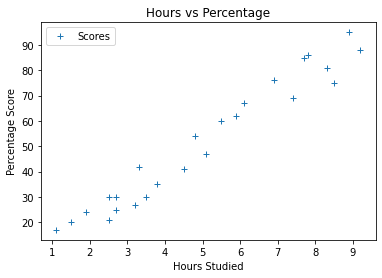

In [ ]:
df_1.plot(x='Hours',y='Scores',style='+') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
df_1.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
df_1.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [ ]:
df_1.corr(method='kendall')

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


In [ ]:
Hours=df_1['Hours']
Scores=df_1['Scores']

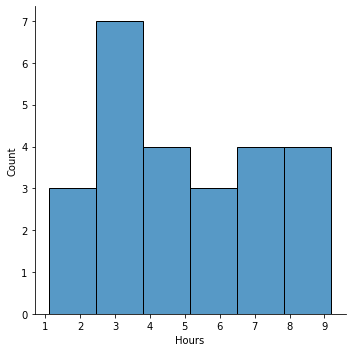

In [ ]:
sns.displot(Hours)

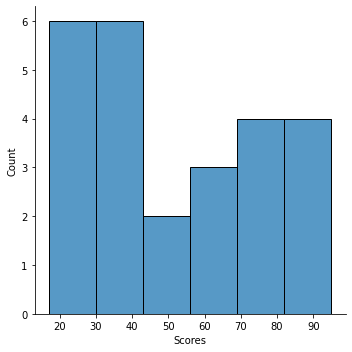

In [ ]:
sns.displot(Scores)

Modifying data for test train

In [ ]:
x=df_1.iloc[:,:-1].values
y=df_1.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
a=LR.coef_
b=LR.intercept_
print('the coefficient of regression:',a,'the intercept of regression:',b)

the coefficient of regression: [9.94167834] the intercept of regression: 1.9322042531516601


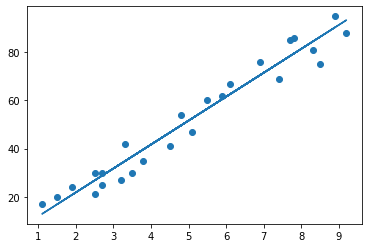

In [ ]:
line=a*x+b
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [ ]:
y_hat=LR.predict(X_test)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [ ]:
df_2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_hat})  
df_2

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Predicting the value of score for hours 9.25

In [ ]:
hours=9.25
Predicted_score=LR.predict([[9.25]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(Predicted_score[0]))

No. of Hours = 9.25
Predicted Score = 93.89272889341652


Evaluating the fitted model using MSE and R^2

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,y_hat)
print('The mean square error is:',MSE)

The mean square error is: 20.33292367497996


In [ ]:
from sklearn.metrics import r2_score
R_score=r2_score(Y_test,y_hat)
print('The R^2 is:',R_score)

The R^2 is: 0.9367661043365056


Since the value of R^2 is 0.9367 hence 93% of variation in the dependent variable is explained by independent variable.